## beat-based manual segmentation


In [1]:
import os
import pretty_midi
import midi_utils as mu
from pathlib import Path
import matplotlib.pyplot as plt

plt.style.use("dark_background")

### quantization based on beat


In [2]:
def calculate_beat_times(bpm, total_length_seconds):
  """
  Calculate the timing of each beat in a MIDI file based on its total length.

  Args:
  bpm (float): Beats per minute of the MIDI file.
  total_length_seconds (float): Total length of the MIDI clip in seconds.

  Returns:
  list: A list containing the time of each beat in seconds.
  """
  beat_duration = 60.0 / bpm
  total_beats = int(bpm * total_length_seconds / 60)
  return [beat_duration * beat for beat in range(total_beats + 1)]


In [3]:
def scale_midi_tempo(midi_obj, original_tempo, target_tempo):
    """
    Scales the tempo of a MIDI file.

    Args:
    midi_obj (pretty_midi.PrettyMIDI): The PrettyMIDI object to be modified.
    original_tempo (float): The original tempo of the MIDI file in beats per minute.
    target_tempo (float): The target tempo in beats per minute.

    Returns:
    pretty_midi.PrettyMIDI: The modified PrettyMIDI object with scaled tempo.
    """
    # Calculate the ratio of the target tempo to the original tempo
    tempo_ratio = target_tempo / original_tempo
    print(f"scaling tempo by {tempo_ratio}")

    # Scale the start and end times of each note in each instrument
    for instrument in midi_obj.instruments:
        for note in instrument.notes:
            note.start *= tempo_ratio
            note.end *= tempo_ratio

    # Scale tempo change events, if any
    print(f"OG tempo is {midi_obj.get_tempo_changes()}")
    # for tempo_change in midi_obj.get_tempo_changes()[1]:
    #     midi_obj.adjust_times([tempo_change], [tempo_change * tempo_ratio])

    # Return the modified PrettyMIDI object
    return midi_obj


In [4]:
def split_midi(midi_file_path, beats_per_segment, output_folder):
  """
  Splits a MIDI file into segments based on the given beat timings and number of beats per segment.

  Args:
  :param midi_file_path: Path to the MIDI file.
  :param actual_tempo: The actual tempo (BPM) of the MIDI file.
  :param beat_timings: List of beat timings at the given tempo.
  :param beats_per_segment: Number of beats in each segment.
  :param output_folder: Folder to save the split MIDI files.

  Returns:
  list (pretty_midi.PrettyMIDI): All of the generated segments.
  """
  # Load MIDI file
  filename = Path(midi_file_path).stem
  midi_data = pretty_midi.PrettyMIDI(midi_file_path)
  
  # Calculate segment start and end times
  scaled_beat_timings = calculate_beat_times(120, midi_data.get_end_time())
  segment_times = [(scaled_beat_timings[i], scaled_beat_timings[min(i + beats_per_segment, len(scaled_beat_timings) - 1)])
                    for i in range(0, len(scaled_beat_timings), beats_per_segment)]

  segments = []
  for i, (start_time, end_time) in enumerate(segment_times):
    # Create a new MIDI object for each segment
    segment_midi = pretty_midi.PrettyMIDI()
    output_filename = f'{filename}_{round(start_time)}-{round(end_time)}.mid'

    # Adjust notes for each instrument
    for instrument in midi_data.instruments:
      segment_instrument = pretty_midi.Instrument(program=instrument.program, is_drum=instrument.is_drum, name=output_filename)
      for note in instrument.notes:
        if start_time <= note.start < end_time:
          new_note = pretty_midi.Note(
            velocity=note.velocity,
            pitch=note.pitch,
            start=note.start - start_time,
            end=min(note.end, end_time) - start_time
          )
          segment_instrument.notes.append(new_note)
      segment_midi.instruments.append(segment_instrument)

    # Save the segment
    segments.append(segment_midi)
    segment_file_path = os.path.join(output_folder, output_filename)
    segment_midi.write(segment_file_path)
    print(f"Segment {i + 1} saved to {segment_file_path}")

### beat visualization test


In [6]:
midi_file = os.path.join("data", "trimmed outputs", "20231220-80-2-t.mid")
dir_out = os.path.join("data", "beats-trouble")
midi = pretty_midi.PrettyMIDI(midi_file)
segs = 8
fs = 100
bpm = 80
piano_roll = midi.get_piano_roll(fs)
beats = calculate_beat_times(bpm, midi.get_end_time())
segments = split_midi(midi_file, segs, dir_out)

# plot
# plt.subplot(2, 1, 1)
# plt.yticks([])
# plt.imshow(mu.trim_piano_roll(piano_roll), aspect='auto', origin='lower', cmap='magma', interpolation='nearest')
# for i, beat in enumerate(beats):
#     plt.axvline(x=beat * fs, color='r' if i % segs == 0 else 'g')

# plt.subplot(2, 2, 3)
# plt.yticks([])
# plt.imshow(mu.trim_piano_roll(segments[0].get_piano_roll()), aspect='auto', origin='lower', cmap='magma', interpolation='nearest')
    
# plt.subplot(2, 2, 4)
# plt.yticks([])
# plt.imshow(mu.trim_piano_roll(segments[1].get_piano_roll()), aspect='auto', origin='lower', cmap='magma', interpolation='nearest')
# plt.show()

Segment 1 saved to data/beats-trouble/20231220-80-2-t_0-4.mid
Segment 2 saved to data/beats-trouble/20231220-80-2-t_4-8.mid
Segment 3 saved to data/beats-trouble/20231220-80-2-t_8-12.mid
Segment 4 saved to data/beats-trouble/20231220-80-2-t_12-16.mid
Segment 5 saved to data/beats-trouble/20231220-80-2-t_16-20.mid
Segment 6 saved to data/beats-trouble/20231220-80-2-t_20-24.mid
Segment 7 saved to data/beats-trouble/20231220-80-2-t_24-28.mid
Segment 8 saved to data/beats-trouble/20231220-80-2-t_28-32.mid
Segment 9 saved to data/beats-trouble/20231220-80-2-t_32-36.mid
Segment 10 saved to data/beats-trouble/20231220-80-2-t_36-40.mid
Segment 11 saved to data/beats-trouble/20231220-80-2-t_40-44.mid
Segment 12 saved to data/beats-trouble/20231220-80-2-t_44-48.mid
Segment 13 saved to data/beats-trouble/20231220-80-2-t_48-52.mid
Segment 14 saved to data/beats-trouble/20231220-80-2-t_52-56.mid
Segment 15 saved to data/beats-trouble/20231220-80-2-t_56-60.mid
Segment 16 saved to data/beats-trouble/

## Visualizing Quantization Effects


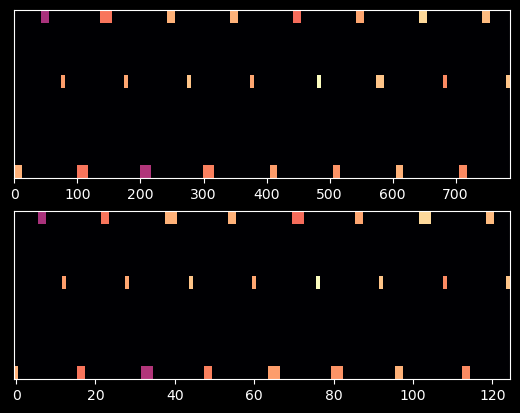

In [ ]:
midi_folder = os.path.join("data", "time", "20231220-80-1-t", "20231220-80-1-t_0-8.mid")
dir_out = os.path.join("data", "beats")
tempo = 80
subds = 12

fpr= pretty_midi.PrettyMIDI(midi_folder)
qpr = mu.quantize_midi(midi_folder, subds)

qpr.write(os.path.join("data", "beats-quantized", "20231220-80-1-tq_0-8.mid"))

plt.subplot(2, 1, 1)
plt.yticks([])
plt.imshow(mu.trim_piano_roll(qpr.get_piano_roll()), aspect='auto', origin='lower', cmap='magma', interpolation='nearest')
plt.subplot(2, 1, 2)
plt.yticks([])
plt.imshow(mu.trim_piano_roll(fpr.get_piano_roll(fs=round(1/(60/(tempo * subds))))), aspect='auto', origin='lower', cmap='magma', interpolation='nearest')
plt.show()

### Actually segment, then generate


In [ ]:
bs_path = os.path.join("data", "beats")
all_in_path = os.path.join("data", "trimmed outputs")
segments = []

for file in os.listdir(all_in_path):
  segments.append(split_midi_into_beats(os.path.join(all_in_path, file), bs_path, 8))

segments_flat = [segment for segmentss in segments for segment in segmentss]
target_len = round(segments_flat[0].get_piano_roll().shape[1]/100)*100
for segment in segments_flat:
  seg_shape = segment.get_piano_roll().shape
  if seg_shape[1] != target_len:
    print(f"{segment.instruments[0].name} has bad length {seg_shape} (wanted {target_len})")
print(f"generated {len(segments_flat)} segments")

[0.0, 0.9090909090909091, 1.8181818181818181, 2.727272727272727, 3.6363636363636362, 4.545454545454545, 5.454545454545454, 6.363636363636363, 7.2727272727272725, 8.181818181818182, 9.09090909090909, 10.0, 10.909090909090908, 11.818181818181818, 12.727272727272727, 13.636363636363637, 14.545454545454545, 15.454545454545453, 16.363636363636363, 17.272727272727273, 18.18181818181818, 19.09090909090909, 20.0, 20.90909090909091, 21.818181818181817, 22.727272727272727, 23.636363636363637, 24.545454545454543, 25.454545454545453, 26.363636363636363, 27.272727272727273, 28.18181818181818, 29.09090909090909, 30.0, 30.909090909090907, 31.818181818181817, 32.72727272727273, 33.63636363636363, 34.54545454545455]
segment 0 start 0.0 end 7.2727272727272725
segment 8 start 7.2727272727272725 end 14.545454545454545
segment 16 start 14.545454545454545 end 21.818181818181817
segment 24 start 21.818181818181817 end 29.09090909090909
segment 32 start 29.09090909090909 end 35.84375
split 20240121-66-2-t int